#Python for Finance


##Future & Present Values

Simple example to calculate the future value of an investment.
Assuming £1000 investment for 5 years at an annual return rate of 8%.

In [2]:
!pip install numpy_financial
import numpy_financial as npf

First install and import numpy financial library.

The fv() function stands for future value.
The pv() function is used to calculate the present value of an investment.

In [5]:
res = npf.fv(rate=0.08, nper=5, pmt=0, pv=-1000)
print(res)

1469.3280768000006


Assuming £10,000 investment for 5 years at an annual return rate of 15%

In [9]:
res = npf.fv(rate=0.15, nper=5, pmt=0, pv=-10000)
print(res)

20113.571874999994


Value of investing £500 at an annual rate of 3% for 2 years.

In [12]:
res = npf.fv(rate=0.03,nper=2, pmt=0, pv=-500)
print(res)

530.4499999999999


To calculate the amount you need to invest annually for 15 years at an interest rate of 7% to result in a total amount of 150,000.

In [3]:
res = npf.pv(rate=0.07,nper=15,pmt=0,fv=150000)
print(res)

-54366.90294635392


##Monthly Loan Payments

The pmt() function is used to compute the payment against loan principal plus interest.

Let's say we want to calculate how much we have to pay monthly to pay back a loan of 100,000 in 5 years. The yearly interest rate is 7%, and is calculated monthly.

In [5]:
res = npf.pmt(rate=0.07/12, nper=5*12, pv=100000, fv=0)
print(res)

-1980.1198540349467


Note that aside from computing a monthly mortgage payment, the pmt() function can be used to return the periodic deposit one must make to achieve a specified future balance with given interest rate.

In [6]:
res = npf.pmt(rate=0.10/12, nper=5*12, pv=0, fv=50000)
print(res)

-645.6855688967499


The above code returns the monthly deposits needed to achieve 50,000 in 5 yearrs with 10% annual interest.

To calculate how much you need to save annually, to result in 100,000 savings in 30 years. Assuming the interest rate is 3%.

In [7]:
res = npf.pmt(rate=0.03/12, nper=30*12, pv=0, fv=100000)
print(res)

-171.60403372945598


##Calculating IRR (**I**nternal **R**ate of **R**eturn)

Numpy Financial has an irr() function, used to calculate the (**I**nternal **R**ate of **R**eturn).

Let's assume we invested 5000 and got the following payments back: 500, 700, 1000, 3000. To calculate the IRR, we firsst need to declare an array with the values, with the first value being our initial investment:

In [8]:
cashflow = [-5000, 500, 700, 1000, 3000]
print(npf.irr(cashflow))

0.012164656866492818


Using the irr() function to compare two investment opportunities and decide which one is better.

>Option 1:

* Requires 50K in investment.
* Will pay 10K, 25K, 25K, 35K, 42K each year for the next 5 years.

>Option 2:

* Requires 30K in investment.
* Will pay 10K, 13K, 18K, 25K, 20K each year for the next 5 years.

In [11]:
cf1 = [-50000, 10000, 25000, 25000, 35000, 42000]
cf2 = [-30000, 10000, 13000, 18000, 25000, 20000]

print("Option 1 :", npf.irr(cf1))
print("Option 2 :", npf.irr(cf2))

Option 1 : 0.3605982754620045
Option 2 : 0.4094208743397143


##Plotting Data

Import matplotlib package for pyplot sub-package used to create graphs and charts.

In [12]:
import matplotlib.pyplot as plt


Let's assume we have a company's 5 month revenue data in an array:

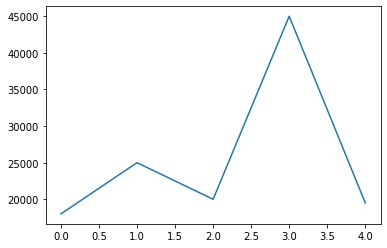

In [13]:
rev = [18000, 25000, 20000, 45000, 19500]
plt.plot(rev)

Adding values for both the x and y axis.

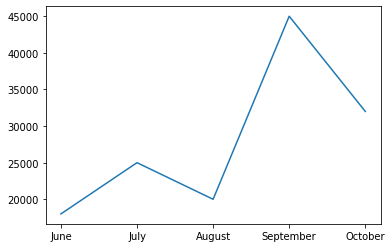

In [14]:
rev = [18000, 25000, 20000, 45000, 32000]
months = ['June', 'July', 'August', 'September', 'October']
plt.plot(months, rev)

##Accessing Data

Web scraping extracts content and data from a website. This method can be used to scrrape any public web page.

Another way to access data is to use a dedicated Python package.

One package called yfinance offers a convenient way to access data from Yahoo Finance.


To scrape data from the web using Python I will use Pandas to scrape and store data in tabular format.

In [15]:
import pandas as pd

Pandas Series based on an array:

In [16]:
prices = [42.8, 102.03, 240.38, 80.9]
s = pd.Series(prices)
print(s)

0     42.80
1    102.03
2    240.38
3     80.90
dtype: float64


We can use the describe() function to see the key statistics:

In [17]:
print(s.describe())

count      4.000000
mean     116.527500
std       86.129132
min       42.800000
25%       71.375000
50%       91.465000
75%      136.617500
max      240.380000
dtype: float64


A dataframe is similar to a spreadsheet, storing data in rows and columns. It is a collection of Series, which correspond to the columns. 

In [19]:
data = {'date': ['2021-06-10', '2021-06-11','2021-06-12','2021-06-13'],'prices':[42.8, 102.03, 240.38, 80.9]}
df = pd.DataFrame(data)
print(df)

         date  prices
0  2021-06-10   42.80
1  2021-06-11  102.03
2  2021-06-12  240.38
3  2021-06-13   80.90


###Web scraping with Pandas

Pandas provides a read_html() function, which can be used to convert tables on web pages to DataFrames.

For example, let's scrape the list of S&P 500 companies from Wikipedia. 

In [20]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = data[0]
print(df)

    Symbol             Security  ...      CIK      Founded
0      MMM                   3M  ...    66740         1902
1      ABT  Abbott Laboratories  ...     1800         1888
2     ABBV               AbbVie  ...  1551152  2013 (1888)
3     ABMD              Abiomed  ...   815094         1981
4      ACN            Accenture  ...  1467373         1989
..     ...                  ...  ...      ...          ...
500    YUM          Yum! Brands  ...  1041061         1997
501   ZBRA   Zebra Technologies  ...   877212         1969
502    ZBH        Zimmer Biomet  ...  1136869         1927
503   ZION        Zions Bancorp  ...   109380         1873
504    ZTS               Zoetis  ...  1555280         1952

[505 rows x 9 columns]


Let's select and output only the Symbol and Security columns:

In [21]:
df = df[['Symbol', 'Security']]
print(df)

    Symbol             Security
0      MMM                   3M
1      ABT  Abbott Laboratories
2     ABBV               AbbVie
3     ABMD              Abiomed
4      ACN            Accenture
..     ...                  ...
500    YUM          Yum! Brands
501   ZBRA   Zebra Technologies
502    ZBH        Zimmer Biomet
503   ZION        Zions Bancorp
504    ZTS               Zoetis

[505 rows x 2 columns]


We can also fitler the table, for example, by company name:

In [23]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = data[0]
df = df[df['Security'] == 'Apple']
print(df)

   Symbol Security SEC filings  ... Date first added     CIK Founded
44   AAPL    Apple     reports  ...       1982-11-30  320193    1977

[1 rows x 9 columns]


In [24]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = data[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       457 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                505 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


Yahoo Finance provides data on companies, their financial performance and profile.

For example, here is Tesla's profile page:
https://finance.yahoo.com/quote/TSLA/profile

The first table is a list of Key executives. Let's scrape it into a DataFrame:

In [40]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [28]:
url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link,headers={'User-Agent':'Mozilla/5.0 (Windows NT 10,0; Win64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

data = pd.read_html(r.text)
print(data[0])

                       Name  ... Year Born
0          Mr. Elon R. Musk  ...    1972.0
1   Mr. Zachary J. Kirkhorn  ...    1985.0
2     Mr. Andrew D. Baglino  ...    1981.0
3        Mr. Vaibhav Taneja  ...    1978.0
4         Mr. Martin Viecha  ...       NaN
5         Mr. Alan Prescott  ...       NaN
6           Mr. Dave Arnold  ...       NaN
7              Brian Scelfo  ...       NaN
8   Mr. Jeffrey B. Straubel  ...    1976.0
9  Mr. Franz von Holzhausen  ...       NaN

[10 rows x 5 columns]


Now, we can access other financial metrics.
For example, let's scrape the **Earnings Estimates** from the **Analysis** page:

In [30]:
url_link = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link,headers={'User-Agent':'Mozilla/5.0 (Windows NT 10,0; Win64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

data = pd.read_html(r.text)
print(data[0])

  Earnings Estimate  ...  Next Year (2022)
0   No. of Analysts  ...             29.00
1     Avg. Estimate  ...              8.17
2      Low Estimate  ...              5.25
3     High Estimate  ...             11.30
4      Year Ago EPS  ...              6.06

[5 rows x 5 columns]


We used the index [0] as it's the first table on the page.

Now we can access the **Avg.Estimate** row from the table and plot it as a bar chart:

IndexError: ignored

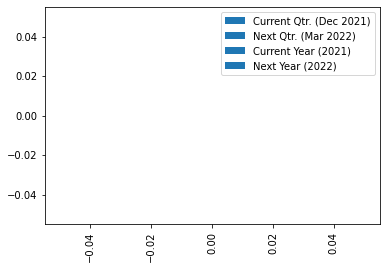

In [52]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

url_link = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link,headers={'User-Agent':'Mozilla/5.0 (Windows NT 10,0; Win64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

data = pd.read_html(r.text)
data = data[0]
data = data[data['Earnings Estimate'] == 'Avg.Estimate']

data.plot(kind='bar')

##yFinance

Scraping Yahoo Finance involves manual work, including adding header, specifying the URL, making the requests and using the read_html() function.

Another way to get financial data from Yahoo Finance is to use the yfinance package It was created to provide a super easy way to access the financial data, without the need for manual work.

We need to install and import it first:

In [55]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3 MB 6.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


After importing the package, we can use its features.
The Ticker module allows us to access company data based on their market ticker symbol.

Let's take Tesla's data:

In [57]:
data = yf.Ticker("TSLA")

print(data.info)

{'zip': '94304', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 70757, 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and veh

We can now access the company information under the corresponding fields. 

Let's output the profit margins and RoE:

In [60]:
print(data.info['profitMargins'])
print(data.info['returnOnEquity'])

0.07403
0.15641


To output the profit margins and RoE of Amazon:

In [61]:
data = yf.Ticker("AMZN")
print(data.info['profitMargins'])
print(data.info['returnOnEquity'])

0.057350002
0.25832


In addition to the **info** fields, the **data** object provides the following fields:


```
#show dividends
print(data.dividends)

#show splits
print(data.splits)

#show balance sheet
print(data.balance_sheet)

#show cashflow
print(data.cashflow)

#show earnings
print(data.earnings)
```


We can print all results for Tesla.

In [62]:
data = yf.Ticker("TSLA")

# show dividends
print(data.dividends)

# show splits
print(data.splits)

# show balance sheet
print(data.balance_sheet)

# show cashflow
print(data.cashflow)

# show earnings
print(data.earnings)

Series([], Name: Dividends, dtype: int64)
Date
2020-08-31    5.0
Name: Stock Splits, dtype: float64
                             2020-12-31  ...    2017-12-31
Intangible Assets          3.130000e+08  ...  3.615020e+08
Capital Surplus            2.726000e+10  ...  9.178024e+09
Total Liab                 2.846900e+10  ...  2.302305e+10
Total Stockholder Equity   2.222500e+10  ...  4.237242e+09
Minority Interest          1.454000e+09  ...  1.395080e+09
Other Current Liab         4.147000e+09  ...  3.098379e+09
Total Assets               5.214800e+10  ...  2.865537e+10
Common Stock               1.000000e+06  ...  1.690000e+05
Other Current Assets       2.380000e+08  ...  1.553230e+08
Retained Earnings         -5.399000e+09  ... -4.974299e+09
Other Liab                 3.302000e+09  ...  4.196294e+09
Good Will                  2.070000e+08  ...  6.023700e+07
Treasury Stock             3.630000e+08  ...  3.334800e+07
Other Assets               1.536000e+09  ...  1.166193e+09
Cash           

We can also easily plot the data.
For example, let' create a bar chart for the revenue:

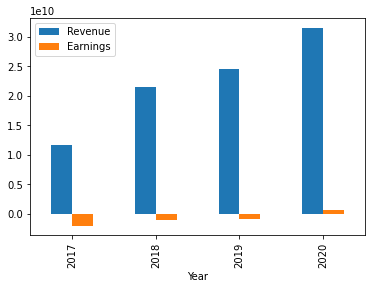

In [63]:
data = yf.Ticker("TSLA")

x = data.earnings

x.plot(kind="bar")

To plot the cash flow table as bar charts.

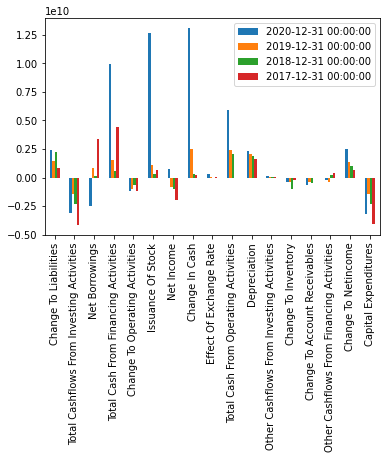

In [65]:
data = yf.Ticker("TSLA")
x = data.cashflow
x.plot(kind="bar")

##Company Data

We can also use the yfinance package to access data on company investors. 

Let's output the list of Tesla's major holders:

In [66]:
print(data.major_holders)

        0                                      1
0  19.34%        % of Shares Held by All Insider
1  43.00%       % of Shares Held by Institutions
2  53.31%        % of Float Held by Institutions
3    2819  Number of Institutions Holding Shares


We can also get the list of the insitutional holders:

In [67]:
print(data.institutional_holders)

                              Holder    Shares  ...   % Out        Value
0         Vanguard Group, Inc. (The)  61992012  ...  0.0617  48073565465
1                     Blackrock Inc.  52829488  ...  0.0526  40968211354
2            Capital World Investors  37427314  ...  0.0373  29024133460
3           State Street Corporation  31230141  ...  0.0311  24218349742
4        Baillie Gifford and Company  13853124  ...  0.0138  10742820599
5      Geode Capital Management, LLC  13169939  ...  0.0131  10213024295
6            Jennison Associates LLC  10630339  ...  0.0106   8243615287
7                           FMR, LLC   9921292  ...  0.0099   7693763520
8         Northern Trust Corporation   8634516  ...  0.0086   6695894467
9  Norges Bank Investment Management   7790070  ...  0.0078   5497218696

[10 rows x 5 columns]
